# **Project Name** - Insurance Price Prediction

##### **Project Type**    - Regression

# Business Case Scenario

Insurance companies must collect a higher premium than the amount which may become due to the insured person. To achieve this, insurance companies invest a lot of time, effort, and money in creating models that accurately predict healthcare expenses

# ***1. Know Your Data***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [70]:
# Reading the file
data = pd.read_csv(r"C:\Users\91961\Downloads\datasets_13720_18513_insurance(1).csv")

# Basis checks

In [71]:
# Checking top 5 rows and columns names
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [72]:
#checking last 5 rows and last row index
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [73]:
# checking data types and any null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Insights

 As per the above information, there are no null values and 3 object data type found in columns sex, smoker and region

In [74]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [75]:
data.shape

(1338, 7)

### Convert Categorical to Numerical

In [76]:
from sklearn.preprocessing import LabelEncoder

# Assuming data is your original DataFrame
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Using Label Encoding
le = LabelEncoder()
data_encoded['sex'] = le.fit_transform(data['sex'])
data_encoded['smoker'] = le.fit_transform(data['smoker'])
data_encoded['region'] = le.fit_transform(data['region'])

In [77]:
data_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,sex,smoker,region
0,19,27.900,0,16884.92400,0,1,0,0,1,0,1,3
1,18,33.770,1,1725.55230,1,0,0,1,0,1,0,2
2,28,33.000,3,4449.46200,1,0,0,1,0,1,0,2
3,33,22.705,0,21984.47061,1,0,1,0,0,1,0,1
4,32,28.880,0,3866.85520,1,0,1,0,0,1,0,1


In [78]:
data_encoded.tail()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,sex,smoker,region
1333,50,30.97,3,10600.5483,1,0,1,0,0,1,0,1
1334,18,31.92,0,2205.9808,0,0,0,0,0,0,0,0
1335,18,36.85,0,1629.8335,0,0,0,1,0,0,0,2
1336,21,25.80,0,2007.9450,0,0,0,0,1,0,0,3
1337,61,29.07,0,29141.3603,0,1,1,0,0,0,1,1


In [79]:
columns_to_remove = ['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
data = data_encoded.drop(columns=columns_to_remove)

In [80]:
data.head()

,age,bmi,children,charges,sex,smoker,region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
 4   sex       1338 non-null   int32  
 5   smoker    1338 non-null   int32  
 6   region    1338 non-null   int32  
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [82]:
#check duplicate values
data.duplicated().sum()


1

In [84]:
#one duplicate row found. we will remove it
data = data.drop_duplicates()
data.duplicated().sum()

0

**Age** age of primary beneficiary

**Sex:-** beneficiary’s gender - female or male

**BMI:-** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**Children:-** Number of children covered by health insurance / Number of dependents

**Smoker:-** Smoking or non-smoking

**region:-** the beneficiary's residential area in the US; northeast, southeast, southwest, northwest.

**charges:-** Individual medical costs billed by health insurance (to be predicted)


##  Exploratory Data Analysis

# Univariate Analysis

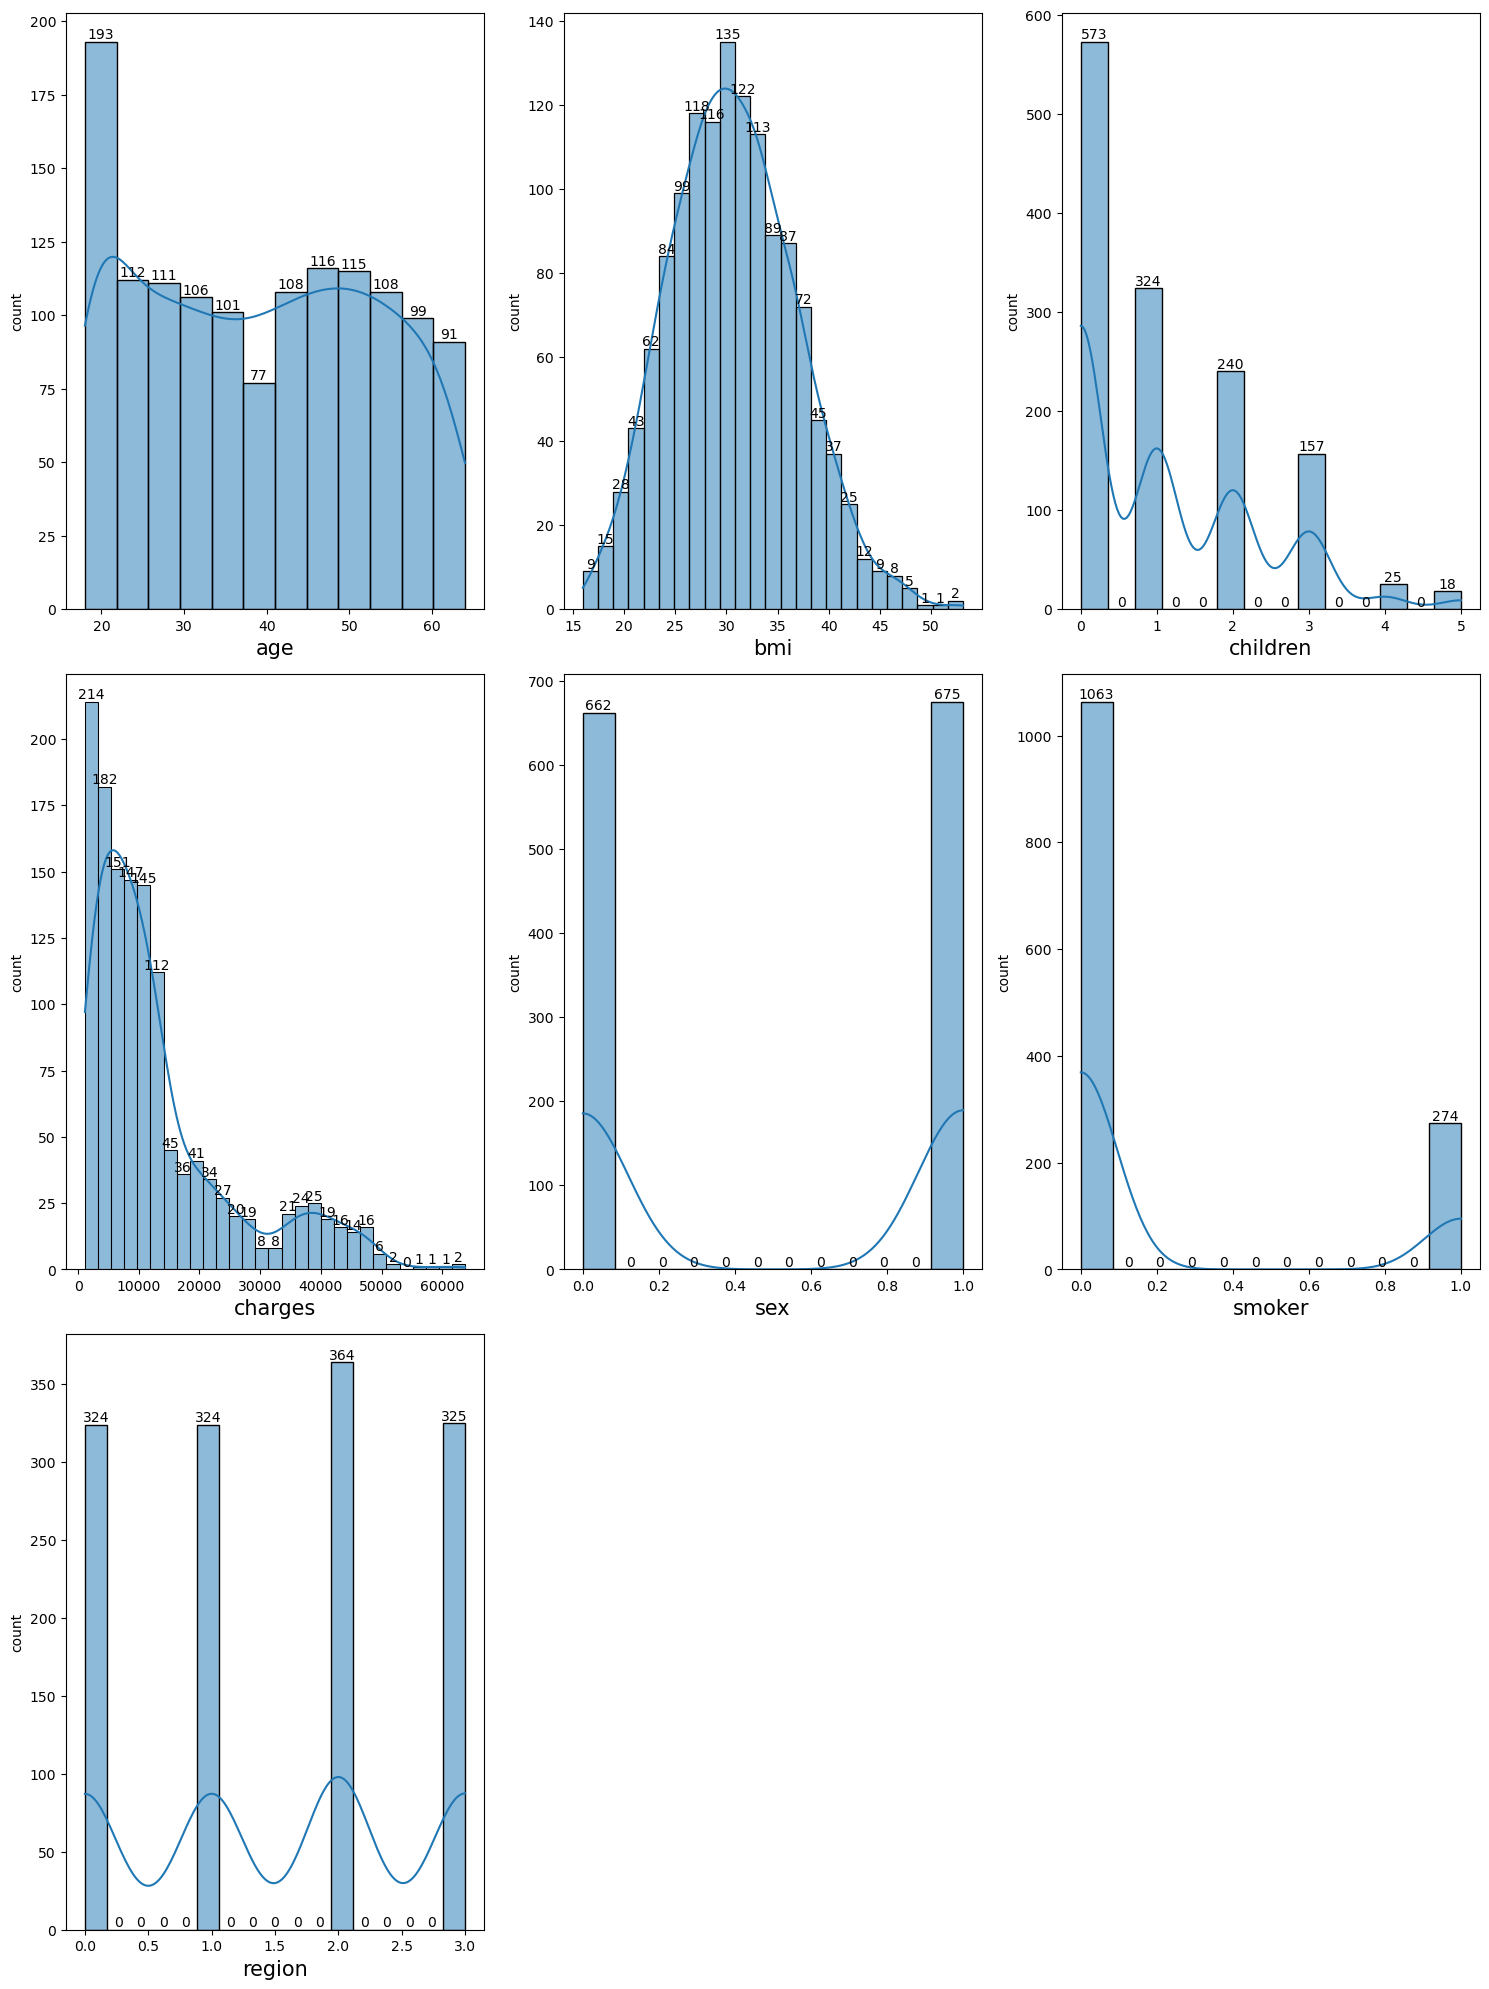

In [85]:
plt.figure(figsize=(15,20))
plotnumber=1

for column in data:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        count=sns.histplot(x=data[column],kde=True)
        for bars in count.containers:
            count.bar_label(bars)
        plt.xlabel(column,fontsize=15)
        plt.ylabel("count")
    plotnumber+=1
plt.tight_layout()

**Sex =** no. of male are 675 and no. of female are 662. it is somewhere equal

**Children =** customer who do no have any children are 573 and having one children are 324, having two children are 240, having  three children are 157, having 4 children are 24 and having five children are 18. this plot shows that when the no of children increases the frequency decreases

**Smoker =** customer who smokes are 274 and customer who don't smoke are 1063. very less no of customer smoking and the customer who are not smoking are more

**Region =** more no of customer are from southeast region and from southwest, northwest, northeast are equal in number

# Bivariate analaysis

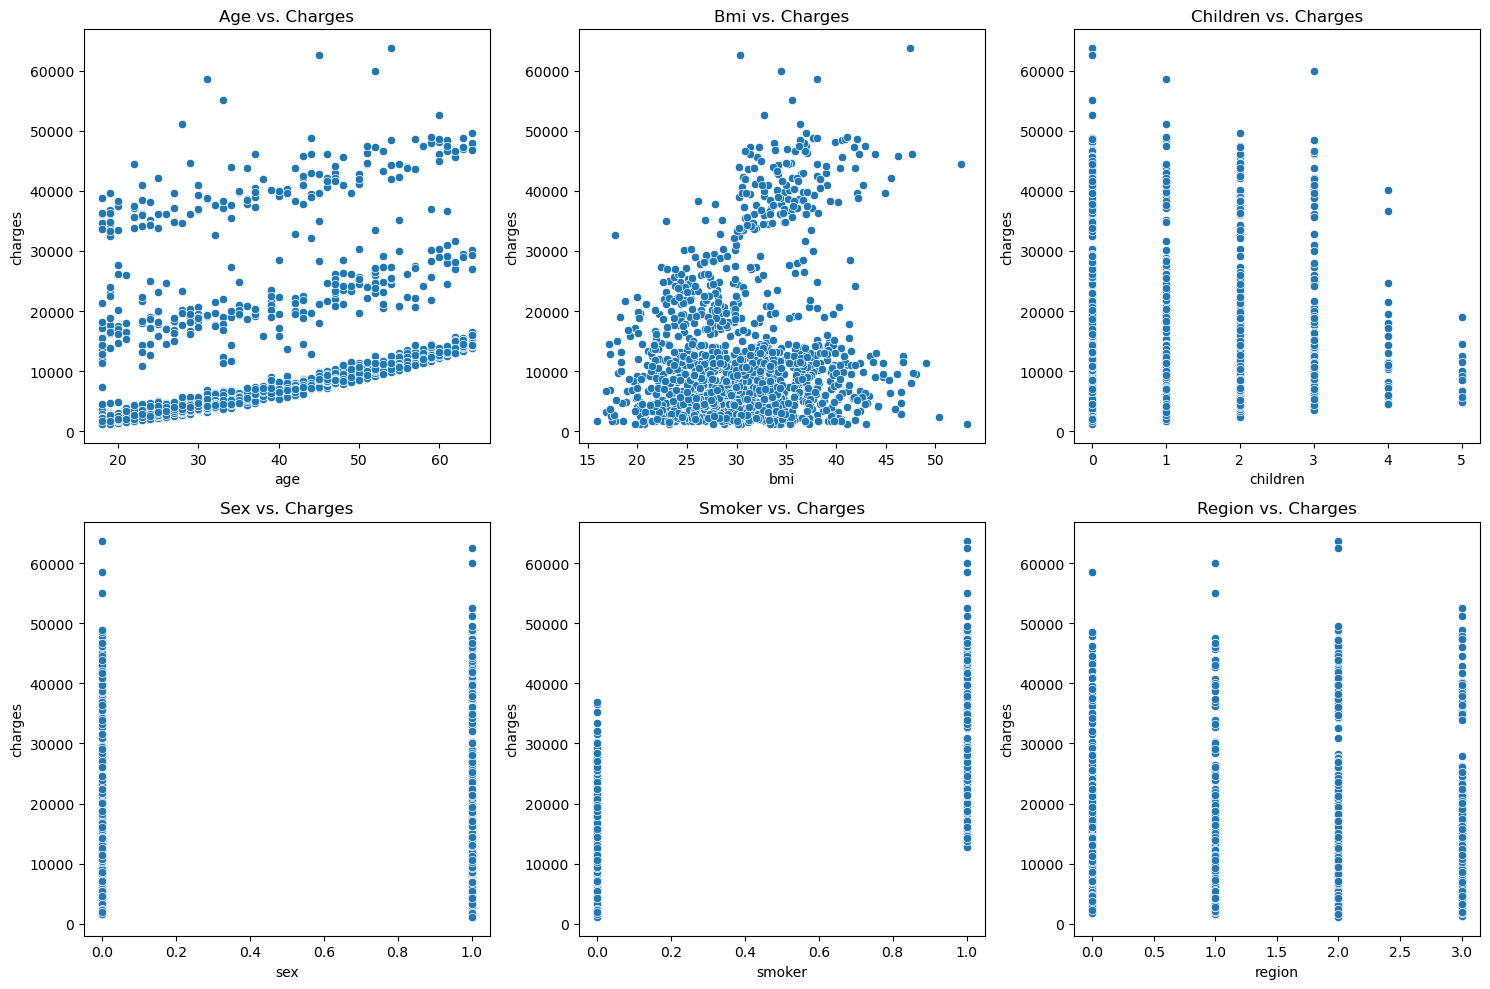

In [86]:
#Bi variate analaysis
import seaborn as sns
import matplotlib.pyplot as plt

# List of variables to compare with 'charges'
variables_to_compare = ['age', 'bmi', 'children', 'sex', 'smoker', 'region']

# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Bivariate analysis for each variable
for i, variable in enumerate(variables_to_compare):
    if data[variable].dtype == 'object':
        # Categorical vs. Continuous (e.g., Boxplot)
        sns.boxplot(x=variable, y='charges', data=data, ax=axes[i // 3, i % 3])
        axes[i // 3, i % 3].set_title(f'{variable.capitalize()} vs. Charges')
    else:
        # Continuous vs. Continuous (e.g., Scatter Plot)
        sns.scatterplot(x=variable, y='charges', data=data, ax=axes[i // 3, i % 3])
        axes[i // 3, i % 3].set_title(f'{variable.capitalize()} vs. Charges')

# Adjust layout
plt.tight_layout()
plt.show()


**Insights** - Based on th Bivariate Analysis **Smokers, Age and BMI** are the main features for high insurance charges

## Handling Outliers

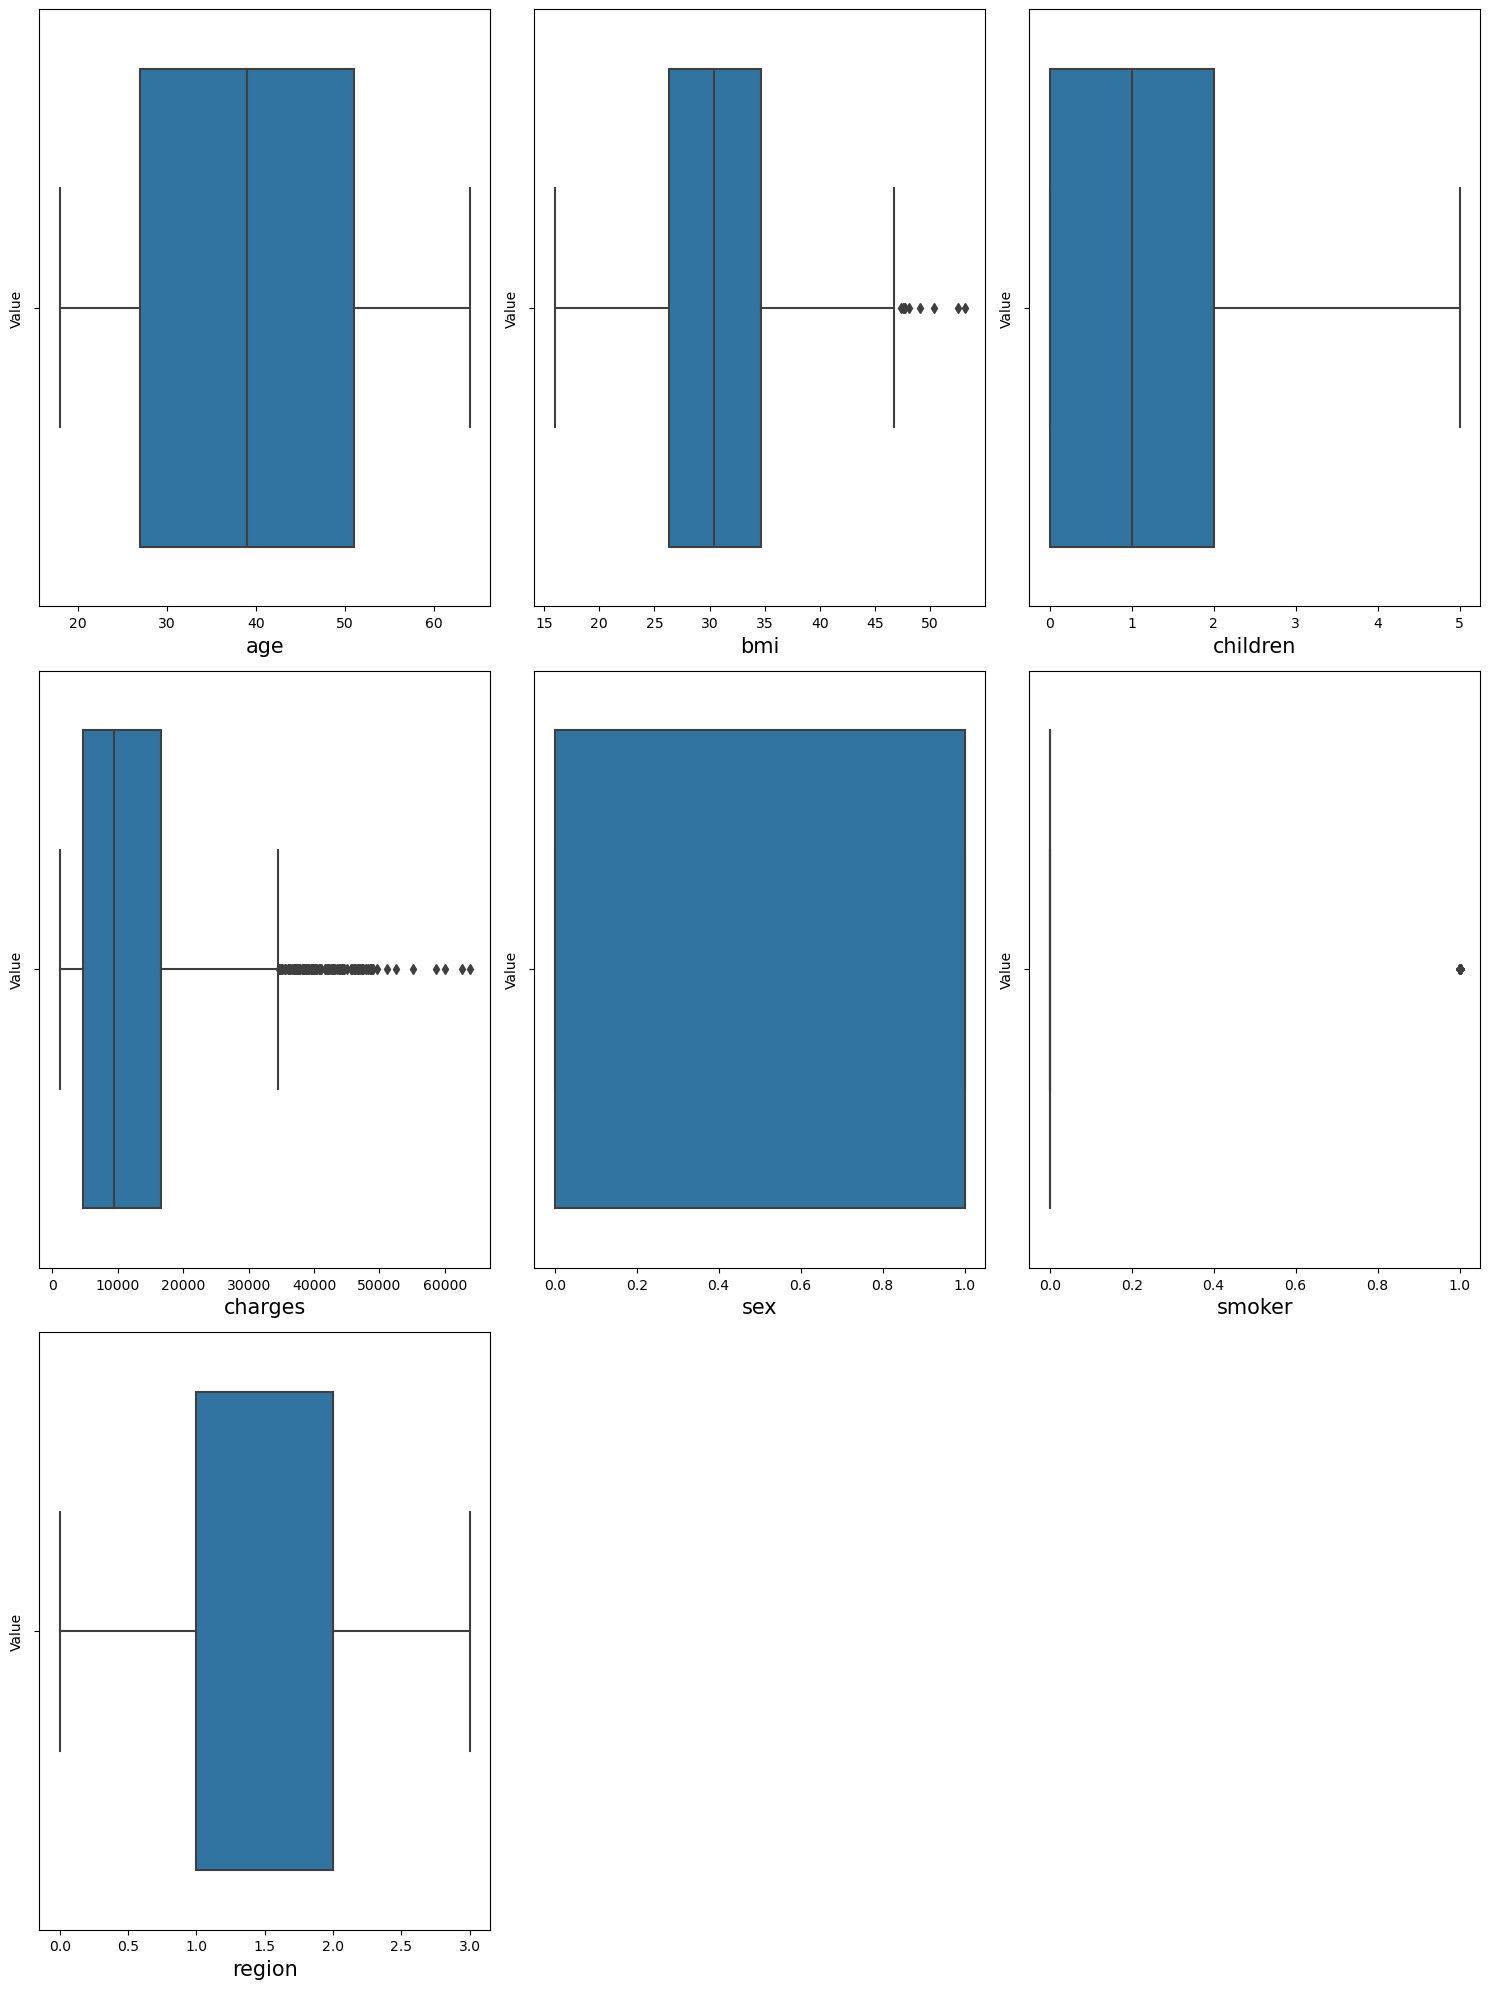

In [87]:
plt.figure(figsize=(15, 20))
plotnumber = 1

for column in data:
    if plotnumber <= 7:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(x=data[column], ax=ax)
        plt.xlabel(column, fontsize=15)
        plt.ylabel("Value")
    plotnumber += 1

plt.tight_layout()
plt.show()


In [88]:
max_bmi = data['bmi'].max()
min_bmi = data['bmi'].min()

print(f"Maximum BMI: {max_bmi}")
print(f"Minimum BMI: {min_bmi}")

Maximum BMI: 53.13
Minimum BMI: 15.96


**Insights** - BMI outlier 53 is in acceptable range for Obesity people, so we are not removing this outlier

# Scaling the data

In [89]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame
columns_to_scale = ['age', 'bmi']

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the specified columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [90]:
data.head()

,age,bmi,children,charges,sex,smoker,region
0,0.021739,0.321227,0,16884.92400,0,1,3
1,0.000000,0.479150,1,1725.55230,1,0,2
2,0.217391,0.458434,3,4449.46200,1,0,2
3,0.326087,0.181464,0,21984.47061,1,0,1
4,0.304348,0.347592,0,3866.85520,1,0,1


# Split the dataset

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
X = data[['age', 'bmi', 'children', 'sex', 'smoker', 'region']]
y = data['charges']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
print(X_train.shape)
print(X_test.shape)

(1069, 6)
(268, 6)


##  ML Model Implementation

### ML Model - 1 Linear Regression

In [93]:
# Building the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = model.predict(X_train)

# Predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluating the model on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluating the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training set:")
print(f"Mean Squared Error: {mse_train}")
print(f"R-squared: {r2_train}")

print("\nTest set:")
print(f"Mean Squared Error: {mse_test}")
print(f"R-squared: {r2_test}")

# Adjusted R-squared for the test set
n_test = len(X_test)  # Number of observations in the test set
k_test = X_test.shape[1]  # Number of predictors

adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - k_test - 1))
print(f"\nAdjusted R-squared (Test set): {adjusted_r2_test}")


Training set:
Mean Squared Error: 37005531.72811555
R-squared: 0.7297182858804965

Test set:
Mean Squared Error: 35493102.61165051
R-squared: 0.8068466322629112

Adjusted R-squared (Test set): 0.8024063249586103


# Feature importance

###  RandomForestRegressor

In [94]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300, random_state=42)

# Fit the model
regressor.fit(X_train, y_train)

# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Score': regressor.feature_importances_})
feature_importance = feature_importance.sort_values(by='Score', ascending=False).reset_index(drop=True)
print(feature_importance.head())


    Feature     Score
0    smoker  0.598729
1       bmi  0.216693
2       age  0.137781
3  children  0.023228
4    region  0.016225


### ML Model - 2 RandomForestRegressor

In [95]:
from sklearn.ensemble import RandomForestRegressor


# Building the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=300, random_state=42)

# Training the model
rf_regressor.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = rf_regressor.predict(X_train)

# Predictions on the test set
y_test_pred = rf_regressor.predict(X_test)

# Evaluating the model on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluating the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training set:")
print(f"Mean Squared Error: {mse_train}")
print(f"R-squared: {r2_train}")

print("\nTest set:")
print(f"Mean Squared Error: {mse_test}")
print(f"R-squared: {r2_test}")

# Adjusted R-squared for the test set
n_test = len(X_test)  # Number of observations in the test set
k_test = X_test.shape[1]  # Number of predictors

adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - k_test - 1))
print(f"\nAdjusted R-squared (Test set): {adjusted_r2_test}")



Training set:
Mean Squared Error: 3416994.7302107634
R-squared: 0.9750428881929295

Test set:
Mean Squared Error: 21472242.826988485
R-squared: 0.883148113021261

Adjusted R-squared (Test set): 0.8804618627458877


### ML Model - 3 GradientBoostingRegressor

In [97]:
from sklearn.ensemble import GradientBoostingRegressor


# Building the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, random_state=42)

# Training the model
gb_regressor.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = gb_regressor.predict(X_train)

# Predictions on the test set
y_test_pred = gb_regressor.predict(X_test)

# Evaluating the model on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluating the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training set:")
print(f"Mean Squared Error: {mse_train}")
print(f"R-squared: {r2_train}")

print("\nTest set:")
print(f"Mean Squared Error: {mse_test}")
print(f"R-squared: {r2_test}")

# Adjusted R-squared for the test set
n_test = len(X_test)  # Number of observations in the test set
k_test = X_test.shape[1]  # Number of predictors

adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - k_test - 1))
print(f"\nAdjusted R-squared (Test set): {adjusted_r2_test}")


Training set:
Mean Squared Error: 9064391.799153224
R-squared: 0.9337953209015905

Test set:
Mean Squared Error: 19352170.3631497
R-squared: 0.894685541594854

Adjusted R-squared (Test set): 0.8922645195625518


# ML Model - 4 XGBRegressor

In [98]:
from xgboost import XGBRegressor

# Assuming X_train, y_train, X_test, and y_test are already defined

# XGBoost regressor model
xgb_regressor = XGBRegressor(n_estimators=300, learning_rate=0.01, random_state=42)

# Training the model
xgb_regressor.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = xgb_regressor.predict(X_train)

# Predictions on the test set
y_test_pred = xgb_regressor.predict(X_test)

# Evaluating the model on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluating the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training set:")
print(f"Mean Squared Error: {mse_train}")
print(f"R-squared: {r2_train}")

print("\nTest set:")
print(f"Mean Squared Error: {mse_test}")
print(f"R-squared: {r2_test}")

# Adjusted R-squared for the test set
n_test = len(X_test)  # Number of observations in the test set
k_test = X_test.shape[1]  # Number of predictors

adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - k_test - 1))
print(f"\nAdjusted R-squared (Test set): {adjusted_r2_test}")


Training set:
Mean Squared Error: 12079234.668382805
R-squared: 0.9117754535886926

Test set:
Mean Squared Error: 19854618.760147218
R-squared: 0.8919512187869539

Adjusted R-squared (Test set): 0.8894673387590678


# Models comparsion

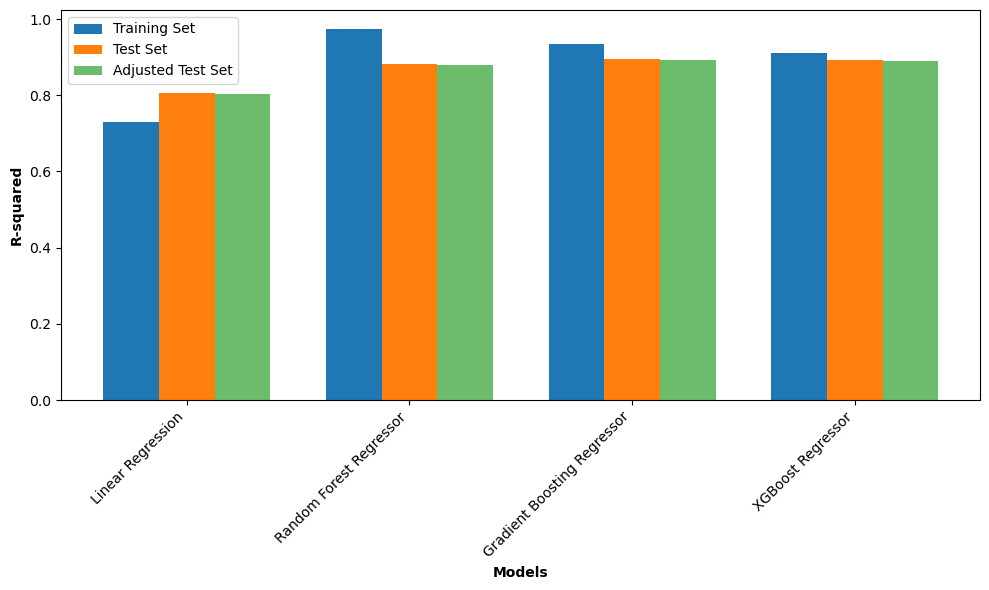

In [52]:
# Model names
models = ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'XGBoost Regressor']

# R-squared values for training set
train_r2 = [0.7297, 0.9750, 0.9338, 0.9118]

# R-squared values for test set
test_r2 = [0.8068, 0.8831, 0.8947, 0.8920]

# Adjusted R-squared values for test set
adjusted_r2 = [0.8024, 0.8804, 0.8923, 0.8895]

# Bar width
bar_width = 0.25

# Bar positions
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, train_r2, width=bar_width, label='Training Set')
plt.bar(r2, test_r2, width=bar_width, label='Test Set')
plt.bar(r3, adjusted_r2, width=bar_width, label='Adjusted Test Set', alpha=0.7)

# Adding labels
plt.xlabel('Models', fontweight='bold')
plt.ylabel('R-squared', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models, rotation=45, ha='right')  # Rotate labels for better readability

# Adding legend
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()


# Interpretation:

**Random Forest Regressor** stands out with a very high R-squared on the training set (0.9750), indicating an excellent fit to the training data. However, it still performs well on the test set with an R-squared of 0.8831.

**Gradient Boosting Regressor** also demonstrates a good balance between fitting the training data and generalizing to the test set, with high R-squared values on both sets.

**Linear Regression and XGBoost Regressor** have lower R-squared values on both the training and test sets, suggesting they may not capture the variability in the target variable as well as Random Forest Regressor and Gradient Boosting Regressor.

# Final Summary

**RandomForestRegressor** showcases exceptional performance with a high training R-squared of **0.975**, indicating a robust fit to the training data. The model extends its effectiveness to the test set, achieving a commendable R-squared of **0.8831** and an adjusted R-squared of **0.8804**. 

These results emphasize the model's ability to generalize well to new data while maintaining predictive accuracy.

**Important Note** Based on our analysis, we recommend that the insurance company consider charging higher premiums for individuals exhibiting **smoking habits**, elevated **obesity**levels, and those aged **60** and above